<a href="https://colab.research.google.com/github/TranPhuong3289/CNN_AI_Artificial-Intelligence/blob/main/PH%C3%82N_LO%E1%BA%A0I_10_LO%E1%BA%A0I_TR%C3%81I_C%C3%82Y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHÂN LOẠI 10 LOẠI TRÁI CÂY - CNN**

In [ ]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#KHAI BÁO TẤT CẢ THƯ VIỆN CẦN DÙNG
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [ ]:
#ĐƯỜNG DẪN ĐẾN TẬP TRAIN, VALIDATION,TEST TRONG MYDRIVE
train_data = '/content/drive/MyDrive/tai lieu AI/data_10loaitraicay/train'
val_data  =  '/content/drive/MyDrive/tai lieu AI/data_10loaitraicay/validation'
test_data =  '/content/drive/MyDrive/tai lieu AI/data_10loaitraicay/test'

In [ ]:
from keras.engine.data_adapter import train_validation_split
#CHỈNH LẠI TỈ LỆ VÀ PRE-PREPROCESSING DATA

data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_validation_split = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
test = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")

Found 600 images belonging to 10 classes.
Found 107 images belonging to 10 classes.
Found 389 images belonging to 10 classes.


In [ ]:
#ĐẶT NHÃN
class_name = ['CAM', 'CÀ RỐT', 'CHUỐI', 'MÃNG CẦU', 'MẬN', 'NHÃN', 'ỔI', 'SẦU RIÊNG', 'TÁO', 'XOÀI']

#IN NHÃN VÀ ĐẶT GIÁ TRỊ CHO TỪNG PHẦN TỬ
print("labels: ", class_name)
print("match class: ", train_validation_split.class_indices)
print("Tổng cộng các loại thức ăn VN : ",train_validation_split.num_classes)

labels:  ['CAM', 'CÀ RỐT', 'CHUỐI', 'MÃNG CẦU', 'MẬN', 'NHÃN', 'ỔI', 'SẦU RIÊNG', 'TÁO', 'XOÀI']
match class:  {'CAM': 0, 'CÀ RỐT': 1, 'CHUỐI': 2, 'MÃNG CẦU': 3, 'MẬN': 4, 'NHÃN': 5, 'ỔI': 6, 'SẦU RIÊNG': 7, 'TÁO': 8, 'XOÀI': 9}
Tổng cộng các loại thức ăn VN :  10


In [ ]:
#XÂY DỰNG MODEL CNN
model=Sequential()

#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 512 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))  #10 class_name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

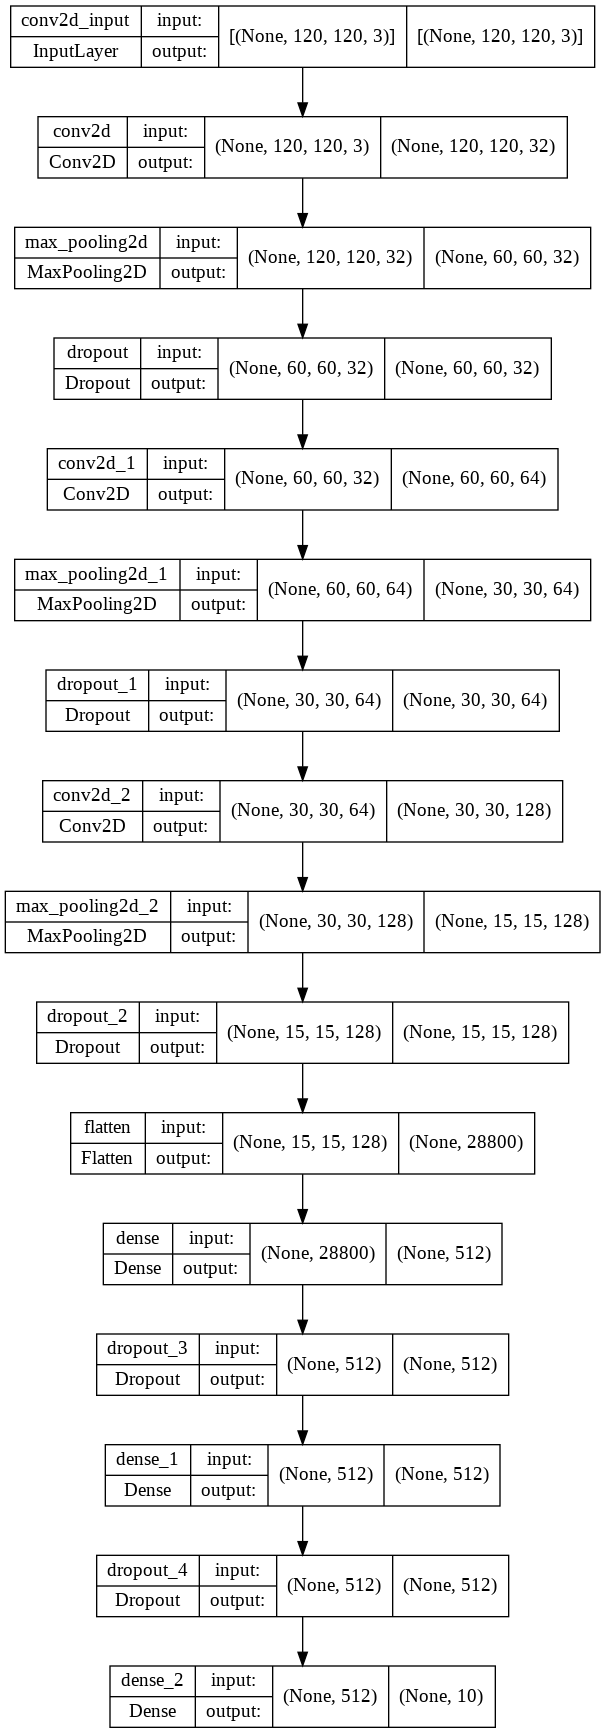

In [ ]:
#hiển thị hàm model.summary() dưới dạng biểu đồ 
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

**COMPILE AND TRANING DATA**

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
#Học 150 lần với bước nhảy (verbose = 1) và số lần train ảnh(batch_size = 30)
Fruit_train = model.fit(train_validation_split,batch_size=30,epochs=150,verbose=1,validation_data=val)  

Epoch 1/150
19/19 [==============================] - 213s 11s/step - loss: 11.0620 - accuracy: 0.0917 - val_loss: 2.3027 - val_accuracy: 0.0694
Epoch 2/150
19/19 [==============================] - 29s 2s/step - loss: 2.3027 - accuracy: 0.1067 - val_loss: 2.3028 - val_accuracy: 0.0694
Epoch 3/150
19/19 [==============================] - 29s 2s/step - loss: 2.2997 - accuracy: 0.1017 - val_loss: 2.3050 - val_accuracy: 0.1054
Epoch 4/150
19/19 [==============================] - 29s 2s/step - loss: 2.2959 - accuracy: 0.1100 - val_loss: 2.3056 - val_accuracy: 0.1028
Epoch 5/150
19/19 [==============================] - 29s 2s/step - loss: 2.2609 - accuracy: 0.1450 - val_loss: 2.0122 - val_accuracy: 0.2494
Epoch 6/150
19/19 [==============================] - 29s 2s/step - loss: 1.9734 - accuracy: 0.2283 - val_loss: 1.8138 - val_accuracy: 0.3316
Epoch 7/150
19/19 [==============================] - 29s 2s/step - loss: 1.7527 - accuracy: 0.2817 - val_loss: 1.5691 - val_accuracy: 0.3702
Epoch 8/15

In [ ]:
#Lưu lại model training
model.save('/content/drive/MyDrive/tai lieu AI/data_10loaitraicay/Fruit_classification.h5')

In [ ]:
#In kết quả loss và accuracy của tập training data
test_loss, test_acc = model.evaluate(train_validation_split)
print("\nTest Accuracy: ",test_acc)

19/19 [==============================] - 10s 478ms/step - loss: 0.0439 - accuracy: 0.9867

Test Accuracy:  0.9866666793823242


In [ ]:
#Loading the model
model_1 = tf.keras.models.load_model('/content/drive/MyDrive/tai lieu AI/data_10loaitraicay/Fruit_classification.h5')
model_1.summary()
#plot_model(model_1, show_shapes = True) #chạy hiển thị model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

Text(0.5, 0, 'epoch')

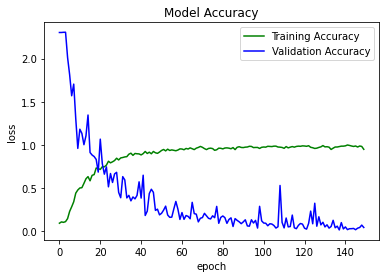

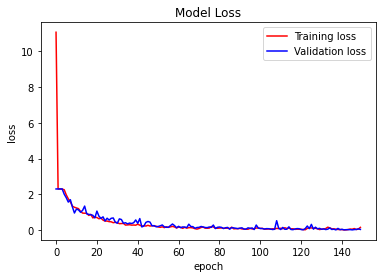

In [ ]:
#Vẽ hàm mất mát và độ chính xác của model
#Graphing loss function and accuracy scores of the model

acc = Fruit_train.history['accuracy'] #traning accuracy scores from the model has trained
val_acc = Fruit_train.history['val_accuracy'] # validatioin accuracy scores from has trained
loss = Fruit_train.history['loss']#training loss scores from the model that has trained
val_loss = val_acc = Fruit_train.history['val_loss'] 


plt.plot(acc,'green', label = 'Training Accuracy')
plt.plot(val_acc,'blue', label = 'Validation Accuracy') 
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend() #hiển thị chú thích
plt.figure()  # tách 2 data riêng biệt accuracy và loss

plt.plot(loss,'red',label = 'Training loss')
plt.plot(val_loss, 'blue',label = 'Validation loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

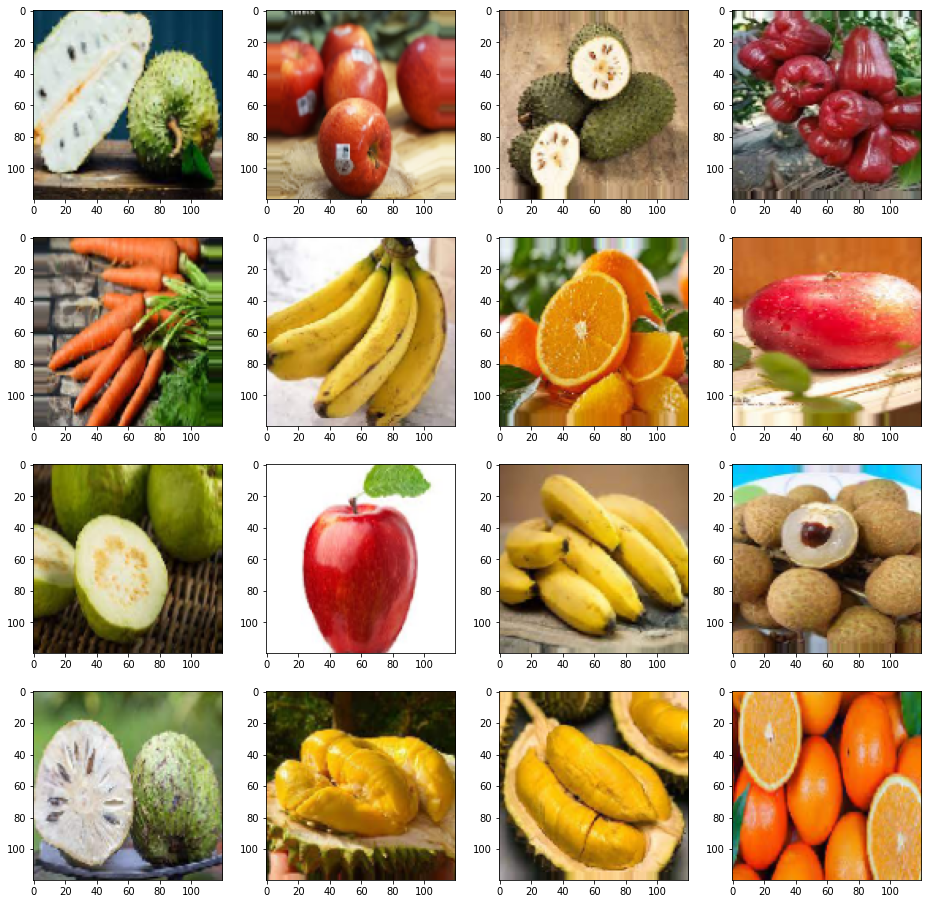

In [ ]:
#Hiển thị ảnh các loại tiền
X_TEST, Y_TEST = next(test)
fig = plt.figure(figsize=(16,16))  
colums = 4 #in 4 hàng 4 cột random loại tiền
rows = 4

for i in range(rows*colums):
    fig.add_subplot(rows, colums, i+1)
    plt.imshow(X_TEST[i])

# **DỰ ĐOÁN:**

In [ ]:
X,Y = test.next()
print('Kích thước tập test:',X.shape)

Kích thước tập test: (32, 120, 120, 3)


Dự đoán quả: CAM


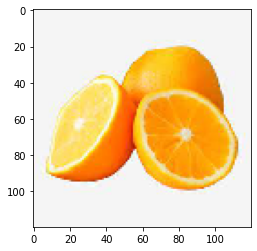

In [ ]:
#Lấy ảnh từ tập test để dự đoán MODEL: 
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_10loaitraicay/test/CAM/images (20).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Dự đoán quả: CAM")
if guess[0]==1:
  print("Dự đoán quả: CÀ RỐT")
if guess[0]==2:
  print("Dự đoán quả: CHUỐI")
if guess[0]==3:
  print("Dự đoán quả: MÃNG CẦU")
if guess[0]==4:
  print("Dự đoán quả: MẬN")
if guess[0]==5:
  print("Dự đoán quả: NHÃN")
if guess[0]==6:
  print("Dự đoán quả: ỔI")
if guess[0]==7:
  print("Dự đoán quả: SẦU RIÊNG")
if guess[0]==8:
  print("Dự đoán quả: TÁO")
if guess[0]==9:
  print("Dự đoán quả: XOÀI")


Dự đoán quả: SẦU RIÊNG


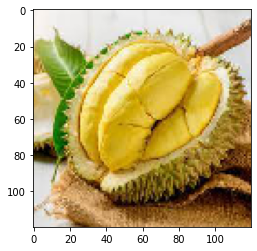

In [ ]:
#Lấy ảnh từ tập test để dự đoán: 
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_10loaitraicay/test/SẦU RIÊNG/download (2).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Dự đoán quả: CAM")
if guess[0]==1:
  print("Dự đoán quả: CÀ RỐT")
if guess[0]==2:
  print("Dự đoán quả: CHUỐI")
if guess[0]==3:
  print("Dự đoán quả: MÃNG CẦU")
if guess[0]==4:
  print("Dự đoán quả: MẬN")
if guess[0]==5:
  print("Dự đoán quả: NHÃN")
if guess[0]==6:
  print("Dự đoán quả: ỔI")
if guess[0]==7:
  print("Dự đoán quả: SẦU RIÊNG")
if guess[0]==8:
  print("Dự đoán quả: TÁO")
if guess[0]==9:
  print("Dự đoán quả: XOÀI")


Dự đoán quả: TÁO


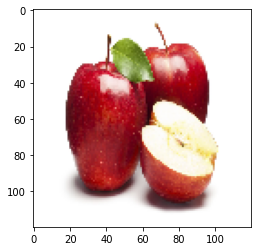

In [ ]:
#Lấy ảnh từ tập test để dự đoán: 
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_10loaitraicay/test/TÁO/5471637_Cover.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Dự đoán quả: CAM")
if guess[0]==1:
  print("Dự đoán quả: CÀ RỐT")
if guess[0]==2:
  print("Dự đoán quả: CHUỐI")
if guess[0]==3:
  print("Dự đoán quả: MÃNG CẦU")
if guess[0]==4:
  print("Dự đoán quả: MẬN")
if guess[0]==5:
  print("Dự đoán quả: NHÃN")
if guess[0]==6:
  print("Dự đoán quả: ỔI")
if guess[0]==7:
  print("Dự đoán quả: SẦU RIÊNG")
if guess[0]==8:
  print("Dự đoán quả: TÁO")
if guess[0]==9:
  print("Dự đoán quả: XOÀI")


Dự đoán quả: ỔI


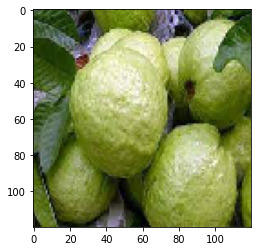

In [ ]:
#Lấy ảnh từ tập test để dự đoán: 
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_10loaitraicay/test/ỔI/images (19).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Dự đoán quả: CAM")
if guess[0]==1:
  print("Dự đoán quả: CÀ RỐT")
if guess[0]==2:
  print("Dự đoán quả: CHUỐI")
if guess[0]==3:
  print("Dự đoán quả: MÃNG CẦU")
if guess[0]==4:
  print("Dự đoán quả: MẬN")
if guess[0]==5:
  print("Dự đoán quả: NHÃN")
if guess[0]==6:
  print("Dự đoán quả: ỔI")
if guess[0]==7:
  print("Dự đoán quả: SẦU RIÊNG")
if guess[0]==8:
  print("Dự đoán quả: TÁO")
if guess[0]==9:
  print("Dự đoán quả: XOÀI")


Dự đoán quả: XOÀI


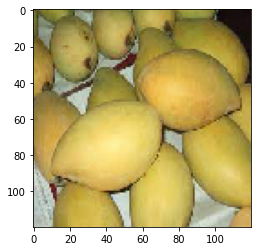

In [ ]:
#Lấy ảnh từ tập test để dự đoán: 
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_10loaitraicay/test/XOÀI/download (4).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Dự đoán quả: CAM")
if guess[0]==1:
  print("Dự đoán quả: CÀ RỐT")
if guess[0]==2:
  print("Dự đoán quả: CHUỐI")
if guess[0]==3:
  print("Dự đoán quả: MÃNG CẦU")
if guess[0]==4:
  print("Dự đoán quả: MẬN")
if guess[0]==5:
  print("Dự đoán quả: NHÃN")
if guess[0]==6:
  print("Dự đoán quả: ỔI")
if guess[0]==7:
  print("Dự đoán quả: SẦU RIÊNG")
if guess[0]==8:
  print("Dự đoán quả: TÁO")
if guess[0]==9:
  print("Dự đoán quả: XOÀI")
